<a href="https://colab.research.google.com/github/argosmaia/ArritmiaDataScience/blob/main/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Argos Maia - Paulo José**

# **As questões respondidas estarão no final desse notebook**

**Bibliotecas necessárias para rodar o programa**

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
import warnings
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE, SelectFromModel, VarianceThreshold, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Inicializa o modulo base necessário para se vizualizar os dados

In [ ]:
caminho = "/content/arritmias_treino.arff"

dados = arff.loadarff(caminho)
base = pd.DataFrame(dados[0])
base

,Age,Sex,Height,Weight,QRS_duration,P-R,Q-T,T_interval,P_interval,QRS,...,Amp_V6_2,Amp_V6_3,Amp_V6_4,Amp_V6_5,Amp_V6_6,Amp_V6_7,Amp_V6_8,Amp_V6_9,Amp_V6_10,class
0,55.0,b'0',175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,b'1'
1,40.0,b'1',160.0,52.0,77.0,129.0,377.0,133.0,77.0,77.0,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,b'1'
2,49.0,b'1',162.0,54.0,78.0,0.0,376.0,157.0,70.0,67.0,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,b'1'
3,44.0,b'0',168.0,56.0,84.0,118.0,354.0,160.0,63.0,61.0,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,b'1'
4,45.0,b'1',165.0,86.0,77.0,143.0,373.0,150.0,65.0,12.0,...,0.0,4.4,-2.2,0.0,0.0,0.5,1.5,4.9,17.2,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,65.0,b'0',172.0,66.0,98.0,199.0,339.0,149.0,181.0,-4.0,...,0.0,15.0,-4.5,0.0,0.0,0.2,-0.4,26.4,23.0,b'10'
398,50.0,b'1',163.0,65.0,75.0,151.0,362.0,137.0,93.0,43.0,...,-0.4,5.1,-1.3,0.0,0.0,0.7,1.0,6.2,11.6,b'1'
399,27.0,b'1',160.0,42.0,78.0,153.0,374.0,165.0,85.0,23.0,...,-0.7,12.2,-2.4,0.0,0.0,0.5,1.9,11.0,25.0,b'1'
400,58.0,b'1',160.0,90.0,82.0,0.0,284.0,196.0,0.0,56.0,...,0.0,14.5,-2.3,0.0,0.0,0.2,-1.7,30.2,16.0,b'15'


Descrição de alguns valores da base

In [ ]:
base.describe()

,Age,Height,Weight,QRS_duration,P-R,Q-T,T_interval,P_interval,QRS,T,...,Amp_V6_1,Amp_V6_2,Amp_V6_3,Amp_V6_4,Amp_V6_5,Amp_V6_6,Amp_V6_7,Amp_V6_8,Amp_V6_9,Amp_V6_10
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,394.000000,...,402.000000,402.000000,402.000000,402.000000,402.000000,402.0,402.000000,402.000000,402.000000,402.000000
mean,46.883085,166.343284,68.475124,88.721393,155.579602,366.564677,169.054726,90.238806,34.927861,34.565990,...,-0.321393,-0.288308,8.956468,-1.341791,0.004478,0.0,0.506716,1.148259,19.600498,28.925622
std,16.213776,39.136777,16.603206,15.312603,46.368091,34.153636,34.178306,26.689359,43.574253,59.526263,...,0.621349,0.551296,3.428765,1.517691,0.053130,0.0,0.352164,1.416437,13.411903,17.447615
min,0.000000,105.000000,6.000000,61.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,...,-5.600000,-4.100000,0.000000,-15.000000,0.000000,0.0,-0.800000,-6.000000,-36.600000,-38.600000
25%,36.000000,160.000000,60.000000,80.000000,141.000000,349.000000,147.250000,79.000000,8.000000,14.000000,...,-0.600000,-0.500000,6.525000,-2.100000,0.000000,0.0,0.400000,0.500000,11.350000,17.325000
50%,47.000000,164.000000,68.000000,86.000000,157.500000,367.000000,161.000000,91.000000,40.000000,41.000000,...,-0.200000,0.000000,8.700000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.450000
75%,59.000000,170.000000,79.000000,94.000000,175.750000,383.000000,178.000000,102.750000,66.000000,63.000000,...,0.000000,0.000000,11.100000,0.000000,0.000000,0.0,0.700000,2.100000,26.175000,40.475000
max,83.000000,780.000000,176.000000,188.000000,524.000000,509.000000,327.000000,205.000000,169.000000,179.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,97.600000


Checa-se quais bases tem valores nulos

In [ ]:
base.isnull().values.any()
#checa onde se há colunas com valores vazios no dataframe
vazios = base.columns[base.isnull().any()].tolist()
print(vazios)

['T', 'P', 'QRST', 'J']


Portanto, aplicaremos a limpeza desses dados

# **Encontra as posições nulas de T**

In [ ]:
base["T"]

0       11.0
1       49.0
2        7.0
3       69.0
4       37.0
       ...  
397    136.0
398     33.0
399     61.0
400   -132.0
401      0.0
Name: T, Length: 402, dtype: float64

In [ ]:
for i, valor in base["T"].items():
    if pd.isnull(valor):
        print(f"NaN encontrado na posição {i}")

NaN encontrado na posição 46
NaN encontrado na posição 71
NaN encontrado na posição 180
NaN encontrado na posição 192
NaN encontrado na posição 218
NaN encontrado na posição 340
NaN encontrado na posição 352
NaN encontrado na posição 392


In [ ]:
descricao = base["T"].describe()
print(descricao)

count    394.000000
mean      34.565990
std       59.526263
min     -177.000000
25%       14.000000
50%       41.000000
75%       63.000000
max      179.000000
Name: T, dtype: float64


# **Cria a mediana de T**

In [ ]:
#Calcula a mediana de T, para fins de substituir valores vazios
mediana = base["T"].dropna().median()
print(mediana)

41.0


# **Substitui os valores nulos pela mediana**

In [ ]:
mediana = base["T"].dropna().median()
base["T"].fillna(mediana, inplace=True)
base["T"]

0       11.0
1       49.0
2        7.0
3       69.0
4       37.0
       ...  
397    136.0
398     33.0
399     61.0
400   -132.0
401      0.0
Name: T, Length: 402, dtype: float64

**OBS:** *Faremos mais um checker para verificar se a nossa base foi normalizada*

In [ ]:
for i, valor in base["T"].items():
    if pd.isnull(valor):
      print(f"NaN encontrado na posição {i}")
    else:
      print("NaN não foi encontrado")

NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi encontrado
NaN não foi

# **Faz a mediana de P**

**Faremos a descrição para normalizar as tabelas de "P"**

In [ ]:
base["P"].describe

<bound method NDFrame.describe of 0      -5.0
1      75.0
2       8.0
3      78.0
4      49.0
       ... 
397    34.0
398    49.0
399    59.0
400     NaN
401    63.0
Name: P, Length: 402, dtype: float64>

Checaremos a base["P"]

In [ ]:
for i, valor in base["P"].items():
    if pd.isnull(valor):
        print(f"NaN encontrado na posição {i}")

NaN encontrado na posição 34
NaN encontrado na posição 39
NaN encontrado na posição 86
NaN encontrado na posição 88
NaN encontrado na posição 96
NaN encontrado na posição 113
NaN encontrado na posição 154
NaN encontrado na posição 157
NaN encontrado na posição 173
NaN encontrado na posição 184
NaN encontrado na posição 197
NaN encontrado na posição 199
NaN encontrado na posição 223
NaN encontrado na posição 233
NaN encontrado na posição 259
NaN encontrado na posição 264
NaN encontrado na posição 278
NaN encontrado na posição 280
NaN encontrado na posição 288
NaN encontrado na posição 290
NaN encontrado na posição 330
NaN encontrado na posição 400


Para a normalização de P, usaremos a mediana de valores de P para que se substitua os NaNs

In [ ]:
#Faz a mediana de valores P
mediana_P = base["P"].dropna().median()
print(mediana)

41.0


Aqui inserimos a mediana onde há valores NaN

In [ ]:
#insere as medianas onde há valores nulos
base["P"].fillna(mediana_P, inplace=True)
base["P"]

0      -5.0
1      75.0
2       8.0
3      78.0
4      49.0
       ... 
397    34.0
398    49.0
399    59.0
400    56.0
401    63.0
Name: P, Length: 402, dtype: float64

In [ ]:
for i, valor in base["T"].items():
    if pd.isnull(valor):
      print(f"NaN encontrado na posição {i}")
    else:
      print("normalizada")

normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
normalizada
norm

# **Faz a mediana de QRST**

Faremos o checador de Nans

In [ ]:
for i, valor in base["QRST"].items():
    if pd.isnull(valor):
      print(f"NaN encontrado na posição {i}")

NaN encontrado na posição 221


Como há apenas um valor NaN em QRST, vamos apenas fazer um loop for das posições 210 até 230

In [ ]:
for i in range(210, 231):
    value = base.loc[i, "QRST"]
    print(f"Posição: {i}, Valor: {value}")

Posição: 210, Valor: 36.0
Posição: 211, Valor: 38.0
Posição: 212, Valor: 61.0
Posição: 213, Valor: 65.0
Posição: 214, Valor: 73.0
Posição: 215, Valor: 49.0
Posição: 216, Valor: 66.0
Posição: 217, Valor: 101.0
Posição: 218, Valor: 20.0
Posição: 219, Valor: 26.0
Posição: 220, Valor: 65.0
Posição: 221, Valor: nan
Posição: 222, Valor: 12.0
Posição: 223, Valor: 66.0
Posição: 224, Valor: 53.0
Posição: 225, Valor: -43.0
Posição: 226, Valor: 55.0
Posição: 227, Valor: 40.0
Posição: 228, Valor: 1.0
Posição: 229, Valor: 13.0
Posição: 230, Valor: 0.0


Faremos a mediana

In [ ]:
#Faz a mediana de valores QRST
mediana_QRST = base["QRST"].dropna().median()
print(mediana_QRST)

40.0


E será inserida em NaN

In [ ]:
#insere as medianas onde há valores nulos
base["QRST"].fillna(mediana_QRST, inplace=True)
base["QRST"]

0      20.0
1      65.0
2      51.0
3      66.0
4      26.0
       ... 
397    13.0
398    38.0
399    48.0
400    81.0
401    20.0
Name: QRST, Length: 402, dtype: float64

In [ ]:
for i, valor in base["QRST"].items():
    if pd.isnull(valor):
      print(f"NaN encontrado na posição {i}")
    else:
      print("Normalizada")

Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Normalizada
Norm

Como podemos ver abaixo, a coluna NaN foi normalizada para o valor da mediana

In [ ]:
for i in range(218, 223):
    value = base.loc[i, "QRST"]
    print(f"Posição: {i}, Valor: {value}")

Posição: 218, Valor: 20.0
Posição: 219, Valor: 26.0
Posição: 220, Valor: 65.0
Posição: 221, Valor: 40.0
Posição: 222, Valor: 12.0


# **Analisaremos a coluna J**

Essa coluna tem um nome indiscrítivel além de ser bem vazia

In [ ]:
base["J"].describe

<bound method NDFrame.describe of 0       NaN
1       NaN
2       NaN
3      84.0
4       NaN
       ... 
397     NaN
398     NaN
399     NaN
400     NaN
401     NaN
Name: J, Length: 402, dtype: float64>

Portanto checaremos, a porcentagem de colunas vazias para que possamos decidir o que fazer com ela

**caso a coluna seja apenas 10% vazia, substitui-se pela mediana, frequência, média ou pela divisão de max - min**

In [ ]:
'''Checando a % de linhas vazias'''

total_linhas = len(base["J"])
contador_vazios = 0
contador_nan = 0

for valor in base["J"]:
    if pd.isnull(valor):
        contador_vazios += 1

percentual_vazios = (contador_vazios / total_linhas) * 100
percentual_nan = (contador_nan / total_linhas) * 100

print(f"Porcentagem de linhas vazias em base['J']: {percentual_vazios:.2f}%")

Porcentagem de linhas vazias em base['J']: 83.08%


Percebemos que essa coluna é desprezível e não terá utilidades

**Devido a coluna "J" ser 83% vazia, excluiremos ela, pois poderá gerar erros futuramente**

In [ ]:
base = base.drop("J", axis=1)

**A coluna "J" acima foi apagada do dataframe**

In [ ]:
if "J" in base.columns:
    print("A coluna 'J' existe no DataFrame.")
else:
    print("A coluna 'J' não existe no DataFrame.")


A coluna 'J' não existe no DataFrame.


## **Limpando os dados de height**

Há alturas que estão maiores que 220 cm, por isso ele ultrapassa o outlier dessa forma, substitui-se pela mediana

In [ ]:
print(f"Max: {base['Height'].max()} cm")
print(f"Min: {base['Height'].min()} cm")

Max: 780.0 cm
Min: 105.0 cm


Calcularemos a frequência de alturas

In [ ]:
heights = base["Height"]
mode_value = sts.mode(heights)
frequency_height = heights.value_counts()[mode_value]

print("Valor mais frequente:", mode_value)
print("Frequência:", frequency_height)

Valor mais frequente: 160.0
Frequência: 72


In [ ]:
# Obtendo o valor mais frequente (moda) da coluna 'Height'
mode_value = base['Height'].mode()[0]

# Substituindo os valores acima de 220 por mode_value
base.loc[base['Height'] > 220, 'Height'] = mode_value

In [ ]:
print(f"Max: {base['Height'].max()} cm")
print(f"Min: {base['Height'].min()} cm")

Max: 188.0 cm
Min: 105.0 cm


## **Verificando e limpando os dados de Weight**

Checamos os dados de Weight

In [ ]:
print(f"Max: {base['Weight'].max()}")
print(f"Min: {base['Weight'].min()}")

Max: 176.0
Min: 6.0


In [ ]:
weights = base["Weight"]
mode_value = sts.mode(weights)
frequency_weight = weights.value_counts().loc[mode_value]

print("Valor mais frequente:", mode_value)
print("Frequência:", frequency_weight)

Valor mais frequente: 70.0
Frequência: 27


In [ ]:
# Obtendo o valor mais frequente (moda) da coluna 'Height'
mode_value = base['Weight'].mode()[0]

# Substituindo os valores acima de 220 por mode_value
base.loc[base['Weight'] > 220, 'Weight'] = mode_value

In [ ]:
print(f"Max: {base['Weight'].max()}")
print(f"Min: {base['Weight'].min()}")

Max: 176.0
Min: 6.0


In [ ]:
# Verificar se o usuário quer imprimir apenas uma linha ou todas as linhas
print_todas = input("Deseja imprimir todas as linhas? (S/N): ").lower() == "s"

# Verificar se o usuário quer imprimir apenas uma linha
if not print_todas:
    linha_desejada = int(input("Digite o número da linha desejada: "))

# Loop para percorrer as linhas do DataFrame
for i, linha in base.iterrows():
    # Verificar se o usuário quer imprimir apenas uma linha
    if not print_todas and i != linha_desejada:
        continue  # Pular para a próxima iteração do loop

    # Imprimir os valores da idade, altura e peso
    idade = linha["Age"]
    altura = linha["Height"]
    peso = linha["Weight"]
    print(f"Linha {i + 1}: Idade={idade}, Altura={altura}, Peso={peso}")

    # Parar o loop se o usuário quiser imprimir apenas uma linha
    if not print_todas:
        break


Deseja imprimir todas as linhas? (S/N): n
Digite o número da linha desejada: 1
Linha 2: Idade=40.0, Altura=160.0, Peso=52.0


Checaremos algumas inconsistências

In [ ]:
# Loop para percorrer as linhas do DataFrame
for index, row in base.iterrows():
    # Verificar inconsistências
    idade = row["Age"]
    altura = row["Height"]
    peso = row["Weight"]

    if idade <= 12 and peso > 80:
        print(f"Inconsistência na linha {index + 1}: Idade={idade}, Altura = {altura}, Peso={peso}")

    '''# Imprimir os valores da idade, altura e peso
    print(f"Linha {index + 1}: Idade={idade}, Altura={altura}, Peso={peso}")'''

Não há insconsistencias com crianças

In [ ]:
# Loop para percorrer as linhas do DataFrame
for index, row in base.iterrows():
    # Verificar inconsistências
    idade = row["Age"]
    altura = row["Height"]
    peso = row["Weight"]

    if idade <= 121 and peso > 100:
        print(f"Linha {index + 1}: Idade = {idade}, Altura = {altura}, Peso = {peso}")

Linha 71: Idade = 52.0, Altura = 155.0, Peso = 104.0
Linha 76: Idade = 55.0, Altura = 185.0, Peso = 105.0
Linha 79: Idade = 52.0, Altura = 155.0, Peso = 104.0
Linha 185: Idade = 33.0, Altura = 168.0, Peso = 105.0
Linha 194: Idade = 53.0, Altura = 169.0, Peso = 176.0
Linha 235: Idade = 66.0, Altura = 160.0, Peso = 124.0
Linha 250: Idade = 50.0, Altura = 160.0, Peso = 106.0
Linha 289: Idade = 62.0, Altura = 170.0, Peso = 110.0


Substituíremos os dados inconsistentes pela frequencia

In [ ]:
height_value = sts.mode(heights)
weight_value = sts.mode(weights)

height_frequency = heights.value_counts()[height_value]
weight_frequency = weights.value_counts()[weight_value]

base.loc[base["Height"] > 220, "Height"] = height_value
base.loc[base["Weight"] > 220, "Weight"] = weight_value

Dados normalizados

# **1. a) Descrição dos dados** 

<p><p></p></p>

**Age**: *Numérico*(razão, continuo) = Mostra a idade dos 402 pacientes presentes na lista

**Sex**: *Categórico* (binário) - Gênero do paciente (0: Masculino, 1: Feminino) = Mostra o sexo do paciente

**Height**: *Numérico* (razão, continuo) = Mostra a altura dos pacientes

**Weight**: *Numérico* (razão, continuo) = Mostra o peso dos pacientes

**QRS_duration**: *Numérico* (razão, continuo) = Duração do complexo QRS

**P-R**: *Numérico* (razão, continuo) = intervalo P-R

**Q-T**: *Numérico* (razão, continuo) = Intervalo Q-T

**T_interval**: *Numérico* (razão, continuo) = intervalo T

**P_interval**: *Numérico* (razão, continuo) = intervalo P

**QRS**: *Numérico* (razão, continuo) = valor do complexo de QRS

**Categoria numérica (razão, continuo) de J até Amp_V6_10**: Representando valores de amplitude de canais diferentes de ESG 

**Class**: Categórico (nominal, dicreta) = Classe de dados de arritmia cardíaca de 1 até 15

**Abaixo tem a códificação de cada dado**

In [ ]:
# Verificar se o usuário deseja imprimir todas as colunas ou apenas uma coluna específica
imprime_tudo = input("Deseja imprimir todas as colunas? (S/N): ").lower() == "s"

# Verificar se o usuário deseja imprimir apenas uma coluna específica
if not imprime_tudo:
    coluna_escolhida = input("Digite o nome da coluna desejada: ")

# Percorrer as colunas da base de dados
for coluna in base.columns:
    # Verificar se o usuário deseja imprimir apenas uma coluna específica
    if not imprime_tudo and coluna != coluna_escolhida:
        continue  # Pular para a próxima iteração do loop
    
    nome = coluna
    tipo = base[coluna].dtype
    
    # Verificar o tipo de dado da coluna
    if tipo == "object":
        # Atributo categórico (nominal)
        escala = "nominal"
        
        # Verificar a cardinalidade
        cardinalidade = "discreta" if base[coluna].nunique() <= 10 else "contínua"
        
    elif tipo in ["int64", "float64"]:
        # Atributo numérico (razão)
        escala = "razão"
        
        # Verificar a cardinalidade
        cardinalidade = "discreta" if base[coluna].nunique() <= 10 else "contínua"
        
        # Verificar se é uma coluna binária
        if base[coluna].nunique() == 2:
            cardinalidade = "binária"
        
    else:
        # Tipo de dado não reconhecido
        escala = "desconhecida"
        cardinalidade = "desconhecida"
    
    # Imprimir a descrição do atributo
    print("Atributo:", nome)
    print("Tipo:", tipo)
    print("Escala:", escala)
    print("Cardinalidade:", cardinalidade)
    print("---------------------------------")

Deseja imprimir todas as colunas? (S/N): S
Atributo: Age
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Atributo: Sex
Tipo: object
Escala: nominal
Cardinalidade: discreta
---------------------------------
Atributo: Height
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Atributo: Weight
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Atributo: QRS_duration
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Atributo: P-R
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Atributo: Q-T
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Atributo: T_interval
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Atributo: P_interval
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Atributo: QRS
Tipo: float64

# **Questão 1. b) Frequência dos dados**

Optamos pela codificação desses dados pois seria mais pratico para que se possa analisar o conteúdo preenchido no dataset, 
ao se descrever os dados de cada atributo presente segundo sua ***frequência, max, min e dp***, analisa-se cada coluna presente

In [ ]:

import pandas as pd

# Verificar se o usuário deseja imprimir todas as colunas ou apenas uma coluna específica
imprime_tudo = input("Deseja imprimir todas as colunas? (S/N): ").lower() == "s"

# Verificar se o usuário deseja imprimir apenas uma coluna específica
if not imprime_tudo:
    coluna_escolhida = input("Digite o nome da coluna desejada: ")

# Percorrer as colunas da base de dados
for coluna in base.columns:
    # Verificar se o usuário deseja imprimir apenas uma coluna específica
    if not imprime_tudo and coluna != coluna_escolhida:
        continue  # Pular para a próxima iteração do loop
    
    nome = coluna
    tipo = base[coluna].dtype
    
    # Verificar o tipo de dado da coluna
    if tipo == "object":
        # Atributo categórico (nominal)
        escala = "nominal"
        
        # Verificar a cardinalidade
        cardinalidade = "discreta" if base[coluna].nunique() <= 10 else "contínua"
        
        # Descrever a frequência dos valores
        frequencia = base[coluna].value_counts()
        
        # Imprimir a frequência
        print("Frequência dos valores:")
        print(frequencia)
        
    elif tipo in ["int64", "float64"]:
        # Atributo numérico (razão)
        escala = "razão"
        
        # Verificar a cardinalidade
        cardinalidade = "discreta" if base[coluna].nunique() <= 10 else "contínua"
        
        # Descrever estatísticas descritivas
        minimo = base[coluna].min()
        maximo = base[coluna].max()
        desvio_padrao = base[coluna].std()
        
        # Imprimir estatísticas descritivas
        print(f"Valor mínimo: {minimo}")
        print(f"Valor máximo: {maximo}")
        print(f"Desvio padrão: {desvio_padrao:.2f}")
        
    else:
        # Tipo de dado não reconhecido
        escala = "desconhecida"
        cardinalidade = "desconhecida"
    
    # Imprimir a descrição do atributo
    print("Atributo:", nome)
    print("Tipo:", tipo)
    print("Escala:", escala)
    print("Cardinalidade:", cardinalidade)
    print("---------------------------------")

Deseja imprimir todas as colunas? (S/N): s
Valor mínimo: 0.0
Valor máximo: 83.0
Desvio padrão: 16.21
Atributo: Age
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Frequência dos valores:
b'1'    227
b'0'    175
Name: Sex, dtype: int64
Atributo: Sex
Tipo: object
Escala: nominal
Cardinalidade: discreta
---------------------------------
Valor mínimo: 146.0
Valor máximo: 188.0
Desvio padrão: 7.63
Atributo: Height
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Valor mínimo: 22.0
Valor máximo: 110.0
Desvio padrão: 14.07
Atributo: Weight
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Valor mínimo: 61.0
Valor máximo: 132.0
Desvio padrão: 10.63
Atributo: QRS_duration
Tipo: float64
Escala: razão
Cardinalidade: contínua
---------------------------------
Valor mínimo: 103.0
Valor máximo: 294.0
Desvio padrão: 26.26
Atributo: P-R
Tipo: float64
Escala: razão
Cardinalidade: contínua
----

# **Questão 1.c)**

implementando o algoritmo J48 no dataset

In [ ]:
# Percorrer todas as colunas do dataset
for coluna in base.columns:
    # Verificar valores nulos
    valores_nulos = base[coluna].isnull().sum()
    if valores_nulos > 0:
        base[coluna].fillna(base[coluna].median(), inplace=True)
        print(f"Coluna '{coluna}' - Valores nulos substituídos pela mediana")

    # Verificar valores discrepantes
    if base[coluna].dtype != object:
        valores_discrepantes = np.abs(base[coluna] - base[coluna].mean()) > 3 * base[coluna].std()
        if valores_discrepantes.sum() > 0:
            base[coluna].where(~valores_discrepantes, other=base[coluna].median(), inplace=True)
            print(f"Coluna '{coluna}' - Valores discrepantes substituídos pela mediana")

    # Verificar valores NaN
    valores_nan = base[coluna].isna().sum()
    if valores_nan > 0:
        base[coluna].fillna(base[coluna].median(), inplace=True)
        print(f"Coluna '{coluna}' - Valores NaN substituídos pela mediana")

Coluna 'Height' - Valores discrepantes substituídos pela mediana
Coluna 'Weight' - Valores discrepantes substituídos pela mediana
Coluna 'QRS_duration' - Valores discrepantes substituídos pela mediana
Coluna 'P-R' - Valores discrepantes substituídos pela mediana
Coluna 'Q-T' - Valores discrepantes substituídos pela mediana
Coluna 'T_interval' - Valores discrepantes substituídos pela mediana
Coluna 'P_interval' - Valores discrepantes substituídos pela mediana
Coluna 'QRS' - Valores discrepantes substituídos pela mediana
Coluna 'T' - Valores discrepantes substituídos pela mediana
Coluna 'P' - Valores discrepantes substituídos pela mediana
Coluna 'QRST' - Valores discrepantes substituídos pela mediana
Coluna 'Heart_rate' - Valores discrepantes substituídos pela mediana
Coluna 'Q_wave' - Valores discrepantes substituídos pela mediana
Coluna 'R_wave' - Valores discrepantes substituídos pela mediana
Coluna 'S_wave' - Valores discrepantes substituídos pela mediana
Coluna 'R_lin_wave' - Valore

Em cima, checamos se os valores discrepantes ainda existem ou se já foram substituídos

In [ ]:
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

limite_inferior = 0  # Defina o limite inferior para remoção de outliers
limite_superior = 100  # Defina o limite superior para remoção de outliers

coluna_escolhida = base.columns[0]  # Selecionar automaticamente o primeiro atributo

base_limpa = base[(base[coluna_escolhida] > limite_inferior) & (base[coluna_escolhida] < limite_superior)]
# Preencher valores ausentes com a média
base_limpa[coluna_escolhida].fillna(base[coluna_escolhida].mean(), inplace=True)

# Normalização
normalizador = MinMaxScaler()
base_normalizada = pd.DataFrame(normalizador.fit_transform(base_limpa), columns=base.columns)

# Discretização
discretizador = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
base_discretizada = pd.DataFrame(discretizador.fit_transform(base_normalizada), columns=base.columns)

# Definir atributo-alvo (classe)
atributo_alvo = base.columns[-1]  # Selecionar automaticamente a última coluna como atributo-alvo

# Separar atributos e classe
X = base_discretizada.drop(atributo_alvo, axis=1)
y = base_discretizada[atributo_alvo]

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar a árvore de decisão (J48)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Realizar a classificação no conjunto de teste
y_pred = tree.predict(X_test)

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f"\nAcurácia: {acuracia:.2f}\n")



Acurácia: 0.73



<ipython-input-54-2d80d38336a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_limpa[coluna_escolhida].fillna(base[coluna_escolhida].mean(), inplace=True)


# **Questão 2**

Modelo   | 1º atributo | 2º atributo | N atributo
------------------------------------------------
Gain     | <p>
ReliefF  | <p>
InfoGain | <p>
CFS      | <p>

**O código abaixo vai demorar para executar**

<ipython-input-63-9ebd73724195>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabela_metodos = tabela_metodos.append({
<ipython-input-63-9ebd73724195>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabela_metodos = tabela_metodos.append({
<ipython-input-63-9ebd73724195>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabela_metodos = tabela_metodos.append({
<ipython-input-63-9ebd73724195>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabela_metodos = tabela_metodos.append({


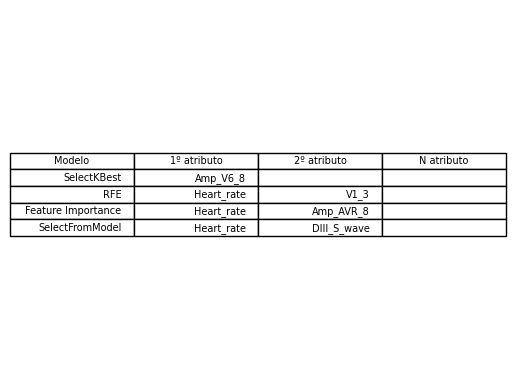

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Definir o atributo-alvo como a última coluna
atributo_alvo = base.columns[-1]

# Separar atributos e classe
X = base.drop(atributo_alvo, axis=1)
y = base[atributo_alvo]

# Realizar imputação dos valores ausentes
imputer = SimpleImputer()
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Converter os dados de destino para formato binário
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Criar uma tabela para armazenar os resultados
tabela_metodos = pd.DataFrame(columns=['Modelo', '1º atributo', '2º atributo', 'N atributo'])

# Definir os modelos para a seleção de variáveis
models = [
    ('SelectKBest', SelectKBest(score_func=mutual_info_classif, k=1)),
    ('RFE', RFE(estimator=LogisticRegression(), n_features_to_select=2)),
    ('Feature Importance', SelectFromModel(RandomForestClassifier(), threshold=-np.inf, max_features=2)),
    ('SelectFromModel', SelectFromModel(SVC(kernel='linear'), max_features=2))
]

# Realizar a seleção de variáveis para cada modelo
for model_name, model in models:
    # Ajustar o modelo aos dados de treinamento
    model.fit(X_imputed, y_encoded)
    
    # Obter os índices dos atributos selecionados
    selected_indices = model.get_support(indices=True)
    
    # Obter os nomes dos atributos selecionados
    selected_attributes = X_imputed.columns[selected_indices].tolist()
    
    # Adicionar os resultados à tabela
    tabela_metodos = tabela_metodos.append({
        'Modelo': model_name,
        '1º atributo': selected_attributes[0] if len(selected_attributes) >= 1 else '',
        '2º atributo': selected_attributes[1] if len(selected_attributes) >= 2 else '',
        'N atributo': ', '.join(selected_attributes) if len(selected_attributes) > 2 else ''
    }, ignore_index=True)

# Imprimir os dados em forma de tabela
plt.table(cellText=tabela_metodos.values, colLabels=tabela_metodos.columns, loc='center')
plt.axis('off')
plt.show()
